In [1]:
from pandas import concat, read_parquet

from data import file
import missingno as msno
import seaborn as sns
import pandas as pd

# Data Loading

In [2]:
data_train = read_parquet(file.news_articles_raw_train)
data_train

,text_original,label
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,Sport
1,"Erfundene Bilder zu Filmen, die als verloren g...",Kultur
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,Web
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",Wirtschaft
4,Estland sieht den künftigen österreichischen P...,Inland
...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,Inland
9241,Sandhere soll in vergangener Woche bei Luftang...,International
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,Wirtschaft
9243,Landeshauptmann will den vierten Regierungssit...,Inland


In [3]:
data_test = read_parquet(file.news_articles_raw_test)
data_test

,text_original,label
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-...",Wirtschaft
1,Franzosen verteidigen 2:1-Führung – Kritische ...,Sport
2,Neues Video von Designern macht im Netz die Ru...,Web
3,23-jähriger Brasilianer muss vier Spiele pausi...,Sport
4,Aufständische verwendeten Chemikalie bei Gefec...,International
...,...,...
1023,"Programm ""Ebay Plus"" soll Ende September start...",Web
1024,"Fehlerhafte Bilanz 2013, Partei will berufen –...",Inland
1025,Als erster Olympia-Champion auch Hawaii-Sieger...,Sport
1026,Der Außenseiter aus Denver gewinnt die 50. Sup...,Sport


In [4]:
data_train_count = concat([data_train, data_train.text_original.str.len().rename("characters_total")], axis=1)
data_train_count

,text_original,label,characters_total
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,Sport,448
1,"Erfundene Bilder zu Filmen, die als verloren g...",Kultur,4020
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,Web,2116
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",Wirtschaft,664
4,Estland sieht den künftigen österreichischen P...,Inland,4393
...,...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,Inland,2385
9241,Sandhere soll in vergangener Woche bei Luftang...,International,969
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,Wirtschaft,1341
9243,Landeshauptmann will den vierten Regierungssit...,Inland,2699


In [5]:
data_test_count = concat([data_test, data_test.text_original.str.len().rename("characters_total")], axis=1)
data_test_count

,text_original,label,characters_total
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-...",Wirtschaft,2775
1,Franzosen verteidigen 2:1-Führung – Kritische ...,Sport,4414
2,Neues Video von Designern macht im Netz die Ru...,Web,2352
3,23-jähriger Brasilianer muss vier Spiele pausi...,Sport,2819
4,Aufständische verwendeten Chemikalie bei Gefec...,International,1006
...,...,...,...
1023,"Programm ""Ebay Plus"" soll Ende September start...",Web,1500
1024,"Fehlerhafte Bilanz 2013, Partei will berufen –...",Inland,2318
1025,Als erster Olympia-Champion auch Hawaii-Sieger...,Sport,3411
1026,Der Außenseiter aus Denver gewinnt die 50. Sup...,Sport,4402


# Data Quality (missingno)

## Training Set

<AxesSubplot:>

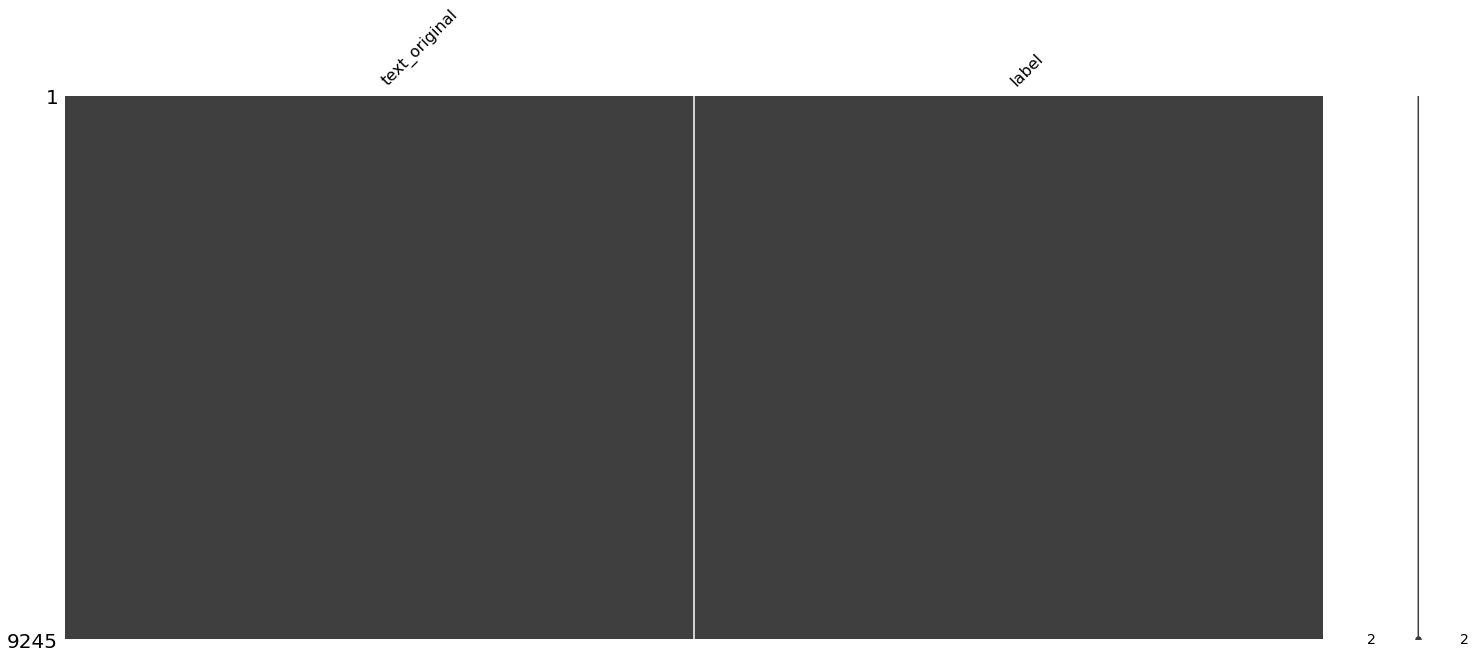

In [6]:
msno.matrix(data_train)

## Test Set

<AxesSubplot:>

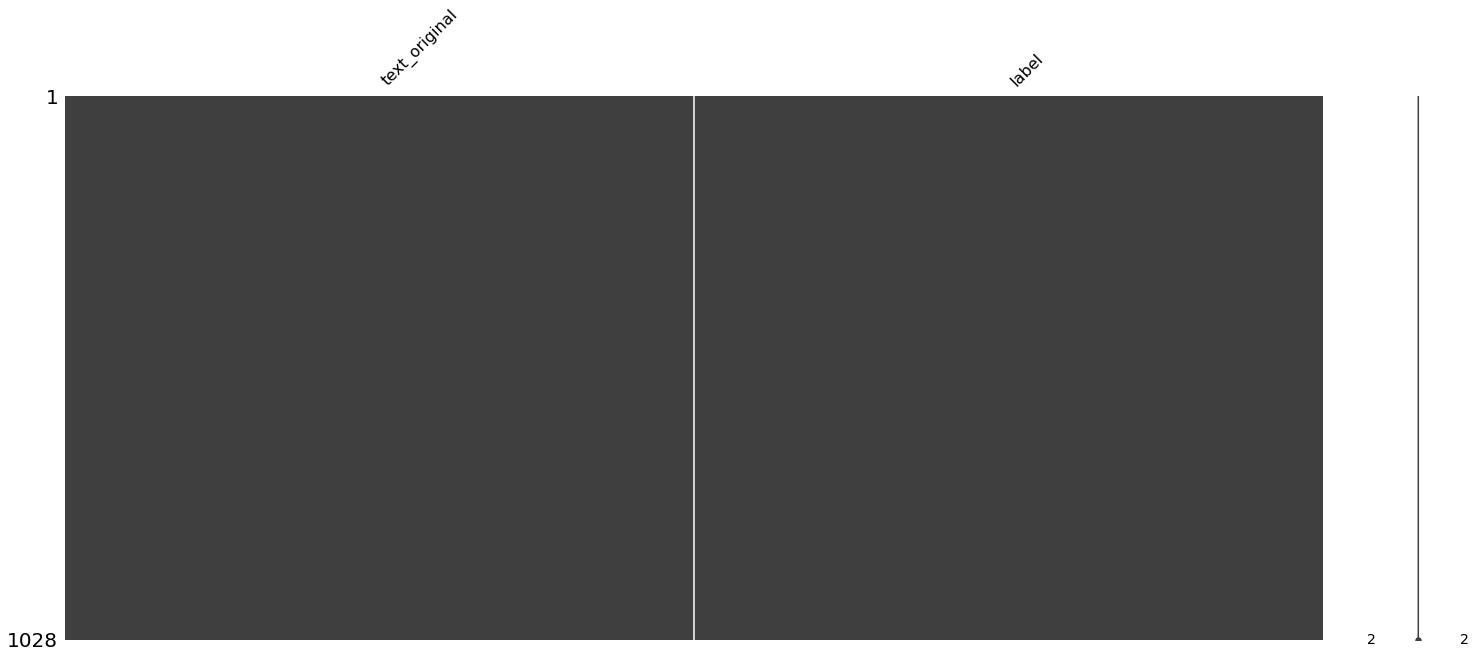

In [7]:
msno.matrix(data_test)

# Data Distribution (Categorical)

## Training Set

<AxesSubplot:xlabel='label', ylabel='count'>

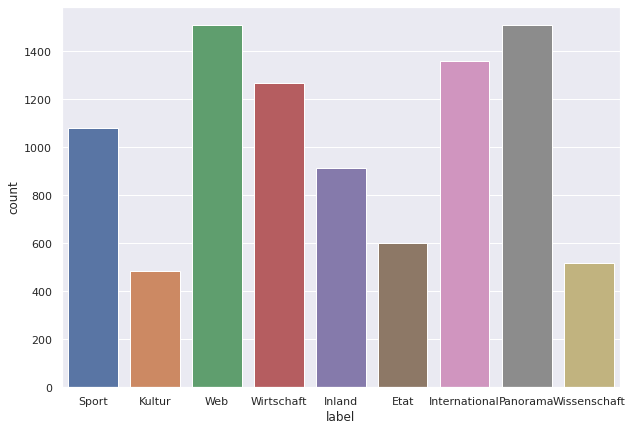

In [8]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.countplot(x="label", data=data_train)

## Test Set

<AxesSubplot:xlabel='label', ylabel='count'>

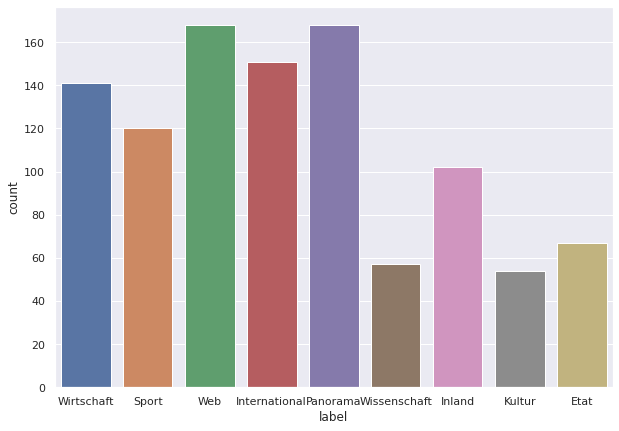

In [9]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.countplot(x="label", data=data_test)

# Data Distribution (Text Length)

## Training Set

<AxesSubplot:xlabel='label', ylabel='characters_total'>

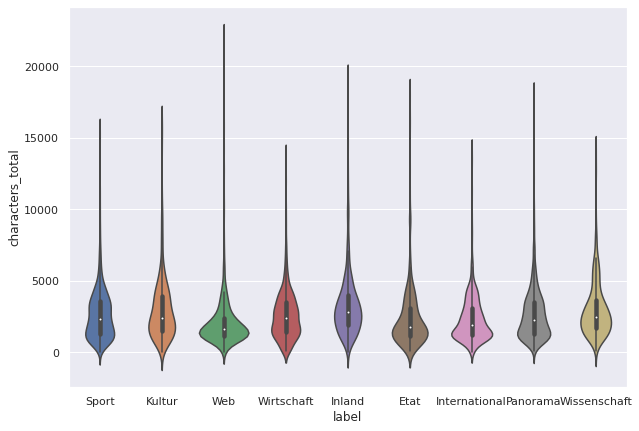

In [10]:
sns.violinplot(x=data_train_count.label, y=data_train_count.characters_total)

## Test Set

<AxesSubplot:xlabel='label', ylabel='characters_total'>

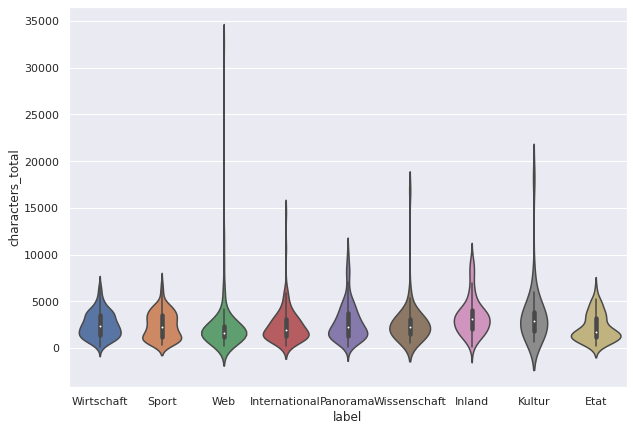

In [11]:
sns.violinplot(x=data_test.label, y=data_test_count.characters_total)

# Language Distribution

# Example Data

## Training Set

In [12]:
pd.set_option('display.max_colwidth', 1000),
data_train_count.sample(100)

,text_original,label,characters_total
385,"Sachverständigengutachten wird derzeit geprüft – Weitere Einvernahmen noch geplant. Wien/Pucking – Nach der Insolvenz der Handelskette dayli im Juli 2013 ermittelt die Wirtschafts- und Korruptionsstaatsanwaltschaft (WKStA) weiterhin gegen den früheren Chef und Eigentümer Rudolf Haberleitner. Der WKStA liegt nun ein beauftragtes Sachverständigengutachten vor, das derzeit geprüft wird. Danach werden noch ergänzende Einvernahmen erforderlich sein, so Oberstaatsanwalt und WKStA-Mediensprecher Norbert Hauser auf APA-Anfrage. Deswegen könne man derzeit zur weiteren Dauer des Ermittlungsverfahrens keine zuverlässigen Angaben machen. Ermittelt wird gegen Haberleitner wegen des Vorwurfs der betrügerischen Krida in Millionenhöhe und der grob fahrlässigen Beeinträchtigung von Gläubigerinteressen. Der ehemalige dayli-Chef hatte die Vorwürfe ihn der Vergangenheit bereits mehrmals zurückgewiesen.",Wirtschaft,895
6273,"Stadt will ab 2017 knapp ein Drittel mehr neue Wohnungen bauen, als Sofortlösung sind mobile Holzhäuser geplant. Wien – Die Stadt Wien will deutlich mehr Wohnungen bauen: Wohnbaustadtrat Michael Ludwig (SPÖ) schwebt ab 2017 eine Steigerung um 30 Prozent gegenüber dem derzeitigen Niveau vor, wie er am Mittwoch in einer Pressekonferenz sagte. Das würde jährlich 13.000 statt 10.000 neue Wohnungen bedeuten, vorerst bis zum Jahr 2020. Die Zahl der geförderten Einheiten soll von rund 7.000 auf 9.000 pro Jahr gesteigert werden, die Anzahl neuer Gemeindewohnungen bis 2020 verdoppelt werden– von bisher geplanten und im rot-grünen Koalitionspapier festgeschriebenen 2.000 auf 4.000. Die Wohnbauoffensive sei eine Reaktion auf das Bevölkerungswachstum, das zuletzt deutlich stärker ausfiel als prognostiziert, sagte Ludwig. 2015 verzeichnete Wien 43.200 neue Bewohner. Da die Aufstockung des Wohnraums erst ab 2018/19 greifen wird, hat man sich im Rathaus eine Sofortlösung überlegt. Sie besteht aus...",Panorama,3653
2702,"Dem greisen Komponisten zugedacht: Peter Härtlings famose Roman-Fantasie ""Verdi"". Wien – Als der Tonsetzer Giuseppe Verdi (1813-1901) seine Aida komponiert hatte, näherte er sich dem sechzigsten Jahr. Der Greis besaß in den Jahren danach durchaus nicht mehr den Wunsch, eine neue Oper zu schreiben. Verdi war zu diesem Zeitpunkt ein Star. Person wie Werk standen gleichsam im Besitz der jungen italienischen Nation. Seine epochale Geltung wurde höchstens von denjenigen bestritten, die Wagners Gesamtkunstwerk Verdis Bemühungen um Psychologie und Schöngesang vorzogen. Er selbst drohte sich verschiedentlich abhandenzukommen. Peter Härtlings wunderbare Roman-Biografie Verdi beginnt irritierend wie ein Film von Michael Haneke. Der greise Komponist erhebt sich mitten in der Nacht aus dem Bett und droht, den Faden seiner Lebenserzählung zu verlieren. Sein eigener Atem dünkt ihn wie der eines Kindes: Hilf mir, bitte. Ich finde mich nicht zurecht. Seine Frau, die Opernsängerin Giuseppina (Peppi...",Kultur,2919
7256,"Nach Schlägereien in Flüchtlingsunterkünften wird eine neue Verteilung diskutiert. Der Streit begann bei der Essensausgabe. Ein 18-jähriger Albaner soll sich nach Polizeiangaben am Wochenende in einer Notunterkunft in Kassel-Calden vorgedrängt haben, was einen 80 Jahre alten Mann aus Pakistan empörte. Zuerst flogen Worte, dann Fäuste, schließlich kam es zu einer Massenschlägerei zwischen 370 Personen. Die Bilanz: ein Dutzend verletzte Flüchtlinge, drei verletzte Polizisten. Der Vorfall ist nicht der erste, der sich in den vergangenen Monaten in einem deutschen Flüchtlingslager abgespielt hat. Doch er hat nun eine Debatte darüber ausgelöst, wie man Gewaltausbrüche in den Unterkünften verhindern könne. Für die Gewerkschaft der Polizei ist die Sache klar. Sie verlangt eine Trennung nach Religionen und Nationen der Flüchtlinge bei der Unterbringung. Unterstützung bekommt sie von den Grünen. Wenn Menschen in den Unterkünften wegen ihrer religiösen Zugehörigkeit oder sexuellen Identität .

## Test Set

In [13]:
data_test_count.sample(100)

,text_original,label,characters_total
857,"""Offene"" Fragen schwieriger – Probleme bei Interpretationen. Wien – Österreichische Volksschüler erzielen bei Multiple-Choice-Aufgaben vergleichsweise bessere Ergebnisse als bei offenen Formaten, wo sie selbst eine Antwort formulieren müssen. Das zeigt eine Auswertung im Expertenbericht zur Volksschul-Lesestudie PIRLS. Sie haben außerdem Schwierigkeiten beim Interpretieren von Informationen bzw. von literarischen Texten. In dem vom Bundesinstitut für Bildungsforschung (Bifie) herausgegebenen Bericht analysieren Wissenschafter die Detailergebnisse der 2011 durchgeführten Volksschul-Vergleichsstudien PIRLS. Insgesamt erreichten die österreichischen Schüler der vierten Klasse Volksschule 529 Punkte und lagen damit über dem Schnitt aller Teilnehmerländer (512 Punkte), aber etwas unter dem EU-Schnitt (534). Die PIRLS-Aufgaben überprüften dabei vier verschiedene sogenannte Verstehensprozesse: Erkennen und Wiedergeben explizit angegebener Informationen, Ziehen einfacher Schlussfolgerungen...",Inland,3442
64,"Neuroforscher entdecken, warum wir in fremder Umgebung meist schlecht schlafen: Schuld ist die linke Hirnhälfte, die nicht zur Ruhe kommt. Providence – Schlafforscher und Handelsreisende kennen das Phänomen: Die erste Nacht in einem fremden Bett ist alles andere als erholsam. Diese Erfahrung ist durchaus universell. Ein japanisches Sprichwort etwa weiß: Wenn du das Kopfkissen wechselst, schläfst Du nicht. Aber warum ist das so? Darauf haben nun Neurowissenschafter von der Brown University in Providence (US-Bundesstaat Rode Island) erstmals eine Antwort gefunden. Wie die Forscher um Yuka Sasaki im Fachjournal Current Biology schreiben, bleibt während der Tiefschlafphase ein bestimmtes Netzwerk der linken Gehirnhemisphäre in einer Art Alarmmodus, während sich die rechte wie gewohnt ausruht. Wir wissen, dass Meerestiere und manche Vögel einen solchen Ein-Hemisphären-Schlaf haben, bei dem eine Hirnhälfte wach bleibt und die andere schläft, erläutert die Professorin für Kognitive Lingui...",Wissenschaft,3026
289,"Militärkapelle hat Probleme mit der ""Marseillaise"". Kairo – Frankreichs Präsident François Hollande bringt von seinem Besuch in Ägyptens Hauptstadt Kairo Geschäftsabschlüsse in Höhe von zwei Milliarden Euro heim. Airbus Space Systems wird Ägypten einen hochmodernen Kommunikationsatelliten verkaufen, der Energiekonzern Engie erhält einen Großauftrag für eine Flüssiggasanlage und den Ausbau erneuerbarer Energien. Beim feierlichen Empfang durch Präsident Abdel Fattah al-Sisi sorgte die Militärkapelle für Aufsehen: Die Musiker haben offenbar die französische Hymne noch nicht besonders oft gespielt und hatten Probleme, den richtigen Ton zu treffen.",International,651
882,"Neue Hinweise auf erstes Einzelspieler-Addon und unbekannte Story-Line. Ursprünglich wollte Rockstar Games bis Ende 2014 die erste Story-Erweiterung zum Gangsterepos Grand Theft Auto 5 herausbringen. Nach dem eigenen Aussagen nach überraschenden Erfolg des Multiplayer-Modus GTA Online wurden diese Pläne allerdings vertagt. Ein Instagram-Posting von Shawn Fonteno, dem Schauspieler hinter dem Charakter Franklin, lässt Fans allerdings nun wieder hoffen. Das Foto zeigt Fonteno kommentarlos in Motion-Capturing-Montur, was genau dahinter steckt, ist jedoch offen. Seitens des Herstellers wurde bislang nichts verraten. Dass es sich dabei um Arbeiten am ersten Story-DLC handelt, liegt nahe. Nicht zuletzt deshalb, weil Fonteno bereits vor zwei Jahren bestätigte, dass er für seine Rolle in der GTA 5-Erweiterung engagiert wurde. Damals betonte er, dass Rockstar sich fürs Addon viel vorgenommen habe. Nach zahlreichen Updates für GTA Online wäre 2016 die Zeit jedenfalls reif für Story-Nachschub....",Web,1919
744,"Der Rapid-Coach denkt dabei aber nicht etwa an Barcelona, sondern an Mittwoch-Gegner Mattersburg. Wien/Mattersburg – Mit vier Siegen in vier Frühjahrsrunden ist Rapid 2016 in der Fußball-Bundesliga die Nummer eins. Für di